<a href="https://colab.research.google.com/github/Mukeshvudayagiri/keep-coding-python/blob/main/Projects/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Sea Level Predictor 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress 

df = pd.read_csv('/content/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


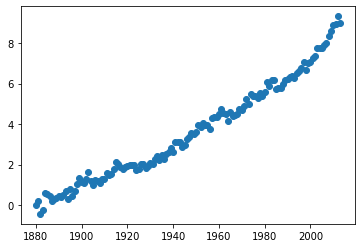

In [3]:
# Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

x = df['Year']
y = df['CSIRO Adjusted Sea Level']
# print(x,y)

fig, ax = plt.subplots()
plt.scatter(x,y)

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)


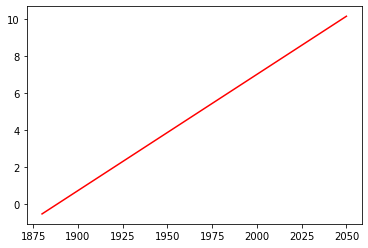

In [5]:
# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
# Plot the line of best fit over the top of the scatter plot. 
# Make the line go through the year 2050 to predict the sea level rise in 2050.

res = linregress(x,y)
print(res) 
x_intercept = pd.Series(x for x in range(1880,2051))
# x_intercept
y_intercept = res.slope * x_intercept + res.intercept
# y_intercept 
plt.plot(x_intercept, y_intercept, 'r')


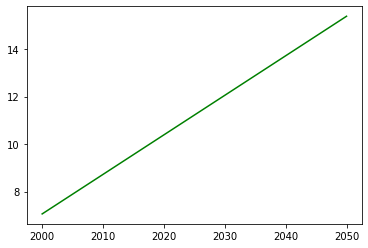

In [14]:
# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
# Make the line also go through the year 2050 to predict the sea level rise in 2050 
# if the rate of rise continues as it has since the year 2000.

df_recent_data = df[df['Year'] >= 2000]
# df_recent_data
x_new = df_recent_data['Year']
y_new = df_recent_data['CSIRO Adjusted Sea Level']

res2= linregress(x_new, y_new)

x_new_intercept = pd.Series(x for x in range(2000, 2051))
y_new_intercept = res2.slope * x_new_intercept + res2.intercept

plt.plot(x_new_intercept, y_new_intercept, 'green') 